## CB02-4 Part Two: Autograd Engine

### 01 Computational Graph
1. Dynamic Computational Graph in the background
2. In the context of deep learning, a computation
graph lays out the sequence of calculations needed to compute the output of a neural network

In [1]:
import torch
import torch.nn.functional as F
y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
z = x1 * w1 + b
a = F.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

In [3]:
loss

tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward0>)

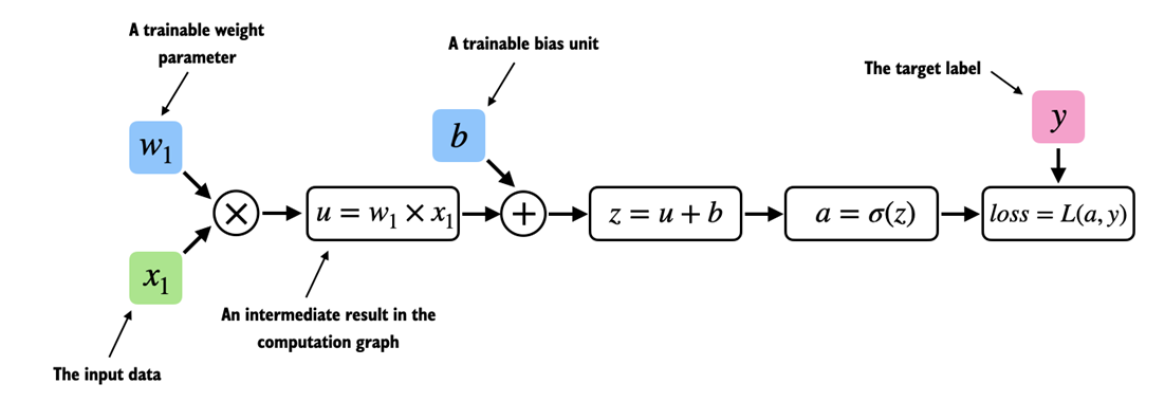

### 02 Back Propagation

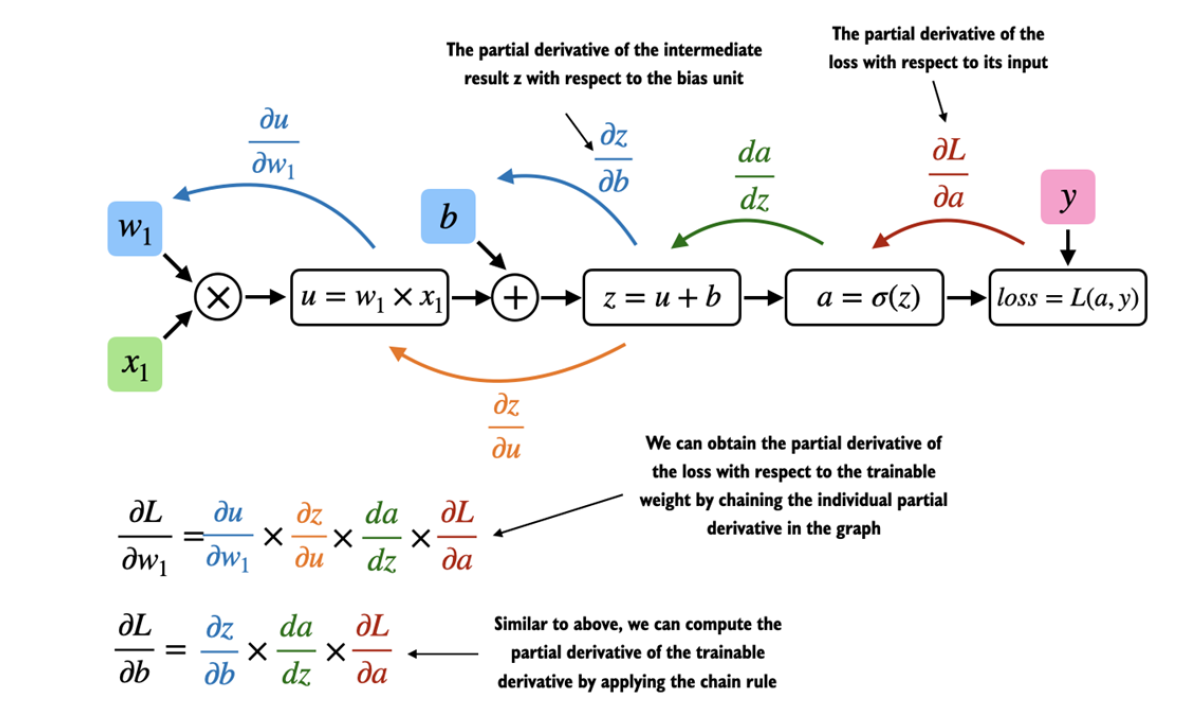

### 'Manual' Grad

In [4]:
import torch.nn.functional as F
from torch.autograd import grad

In [5]:
y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True) # chanagable value -> parameters
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b
a = F.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

'''
By default, PyTorch destroys the computation graph after calculating 
the gradients to free memory.
However, since we are going to reuse this computation graph shortly,
we set retain_graph=True so that it stays in memory.
'''
# Calculate the gradients manully
w1_grad = grad(loss, w1, retain_graph=True)
b_grad = grad(loss, b, retain_graph=True)
w1_grad, b_grad

((tensor([-0.0898]),), (tensor([-0.0817]),))

### High-level API

In [6]:
# calculate the gradients using autograd
loss.backward()
w1.grad, b.grad

(tensor([-0.0898]), tensor([-0.0817]))

In [9]:
print(x1.grad)

None
